In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
fandango = pd.read_csv("fandango_scrape.csv")
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [115]:
fandango.info() #to see no of rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    510 non-null    object 
 1   STARS   510 non-null    float64
 2   RATING  510 non-null    float64
 3   VOTES   510 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 16.1+ KB


In [116]:
fandango.describe() #to see any statistical properties

,STARS,RATING,VOTES
count,510.000000,510.000000,510.000000
mean,3.532353,3.351765,1134.364706
std,1.585616,1.512628,3809.952176
min,0.000000,0.000000,0.000000
25%,3.500000,3.025000,2.000000
50%,4.000000,3.800000,17.500000
75%,4.500000,4.300000,183.500000
max,5.000000,5.000000,34846.000000


<Axes: xlabel='RATING', ylabel='VOTES'>

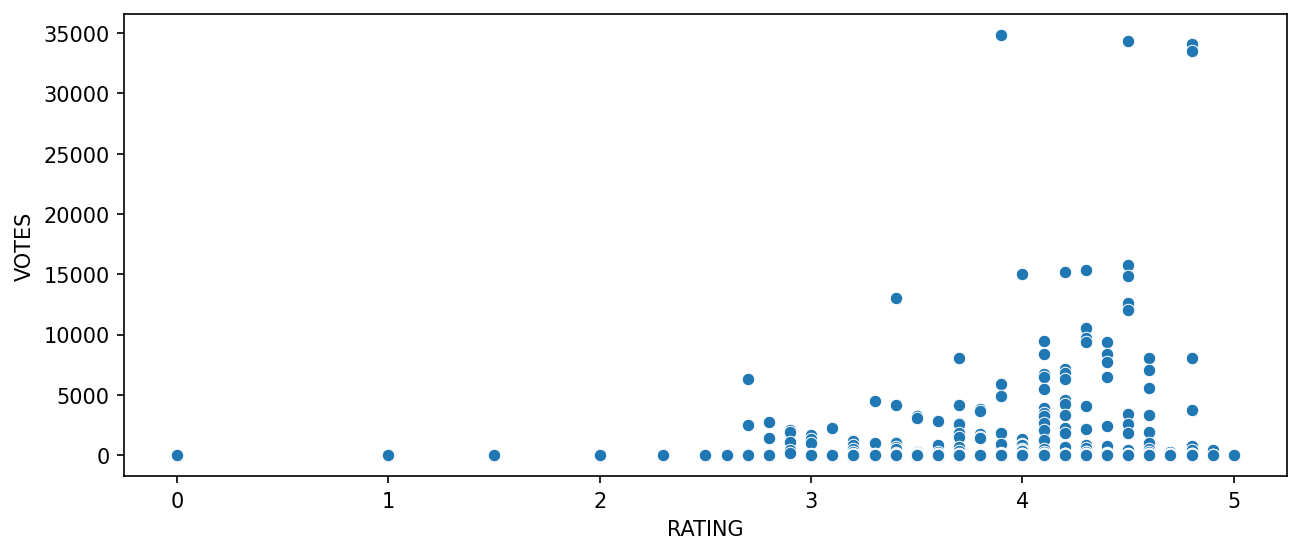

In [117]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango,y='VOTES',x='RATING') #relations b/w votes and rtings

In [118]:
#new column that is able to strip the year from the strings and this new column as YEAR
title ='Film Title Name (Year)'
title.split('(')[-1].replace(')','')
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')',''))
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
505,Valiyavan (2015),0.0,0.0,0,2015
506,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
507,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
508,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [119]:
fandango['YEAR'].value_counts() #no of movies in the fandango data-frame per year?

YEAR
2015    478
2014     23
2012      7
2016      1
1964      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

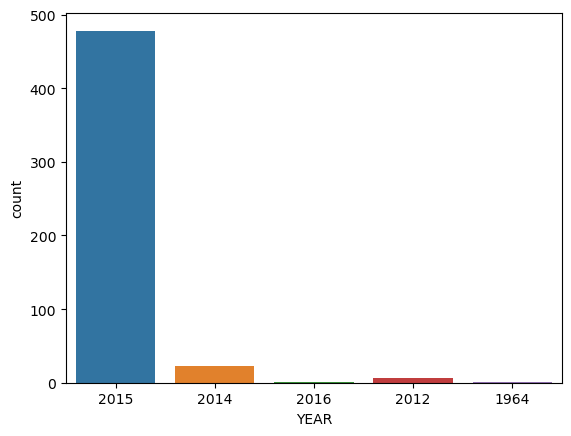

In [120]:
sns.countplot(data=fandango,x='YEAR') #no of movies in the fandango data-frame per year visually? 

In [121]:
fandango.nlargest(10,'VOTES') #top 10 movies with the highest number of votes

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [122]:
no_votes = fandango['VOTES']==0 #total movies having zero votes
no_votes.sum()

73

In [123]:
#creating dataframe of only reviewed films by removing any films that have zero votes.
fan_reviewed = fandango[fandango['VOTES']>0]

C:\Users\KETUPATI SWARGIARY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KETUPATI SWARGIARY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


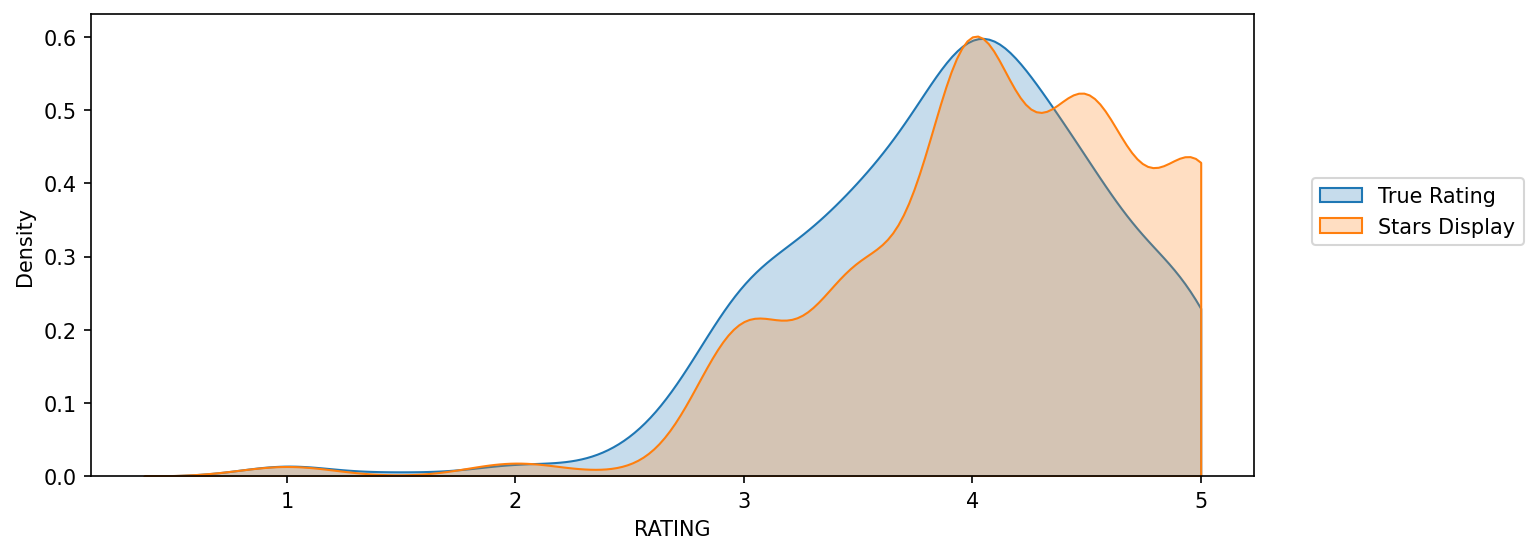

In [124]:
#plot b/w True rating and Stars Displayed
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fan_reviewed,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fan_reviewed,x='STARS',clip=[0,5],fill=True,label='Stars Display')
plt.legend(loc=(1.05,0.5))

In [125]:
#new column for diff b/w STARS displayed versus true Rating and rounding the diff to the nearest decimal point.
fan_reviewed['STARS_DIFF']=fan_reviewed['STARS']-fan_reviewed['RATING']
fan_reviewed['STARS_DIFF']=fan_reviewed['STARS_DIFF'].round(2)
fan_reviewed

C:\Users\KETUPATI SWARGIARY\AppData\Local\Temp\ipykernel_18456\1688373815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF']=fan_reviewed['STARS']-fan_reviewed['RATING']
C:\Users\KETUPATI SWARGIARY\AppData\Local\Temp\ipykernel_18456\1688373815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF']=fan_reviewed['STARS_DIFF'].round(2)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015,0.0
433,The Intern (2015),5.0,5.0,1,2015,0.0
434,The Park Bench (2015),5.0,5.0,1,2015,0.0
435,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<Axes: xlabel='STARS_DIFF', ylabel='count'>

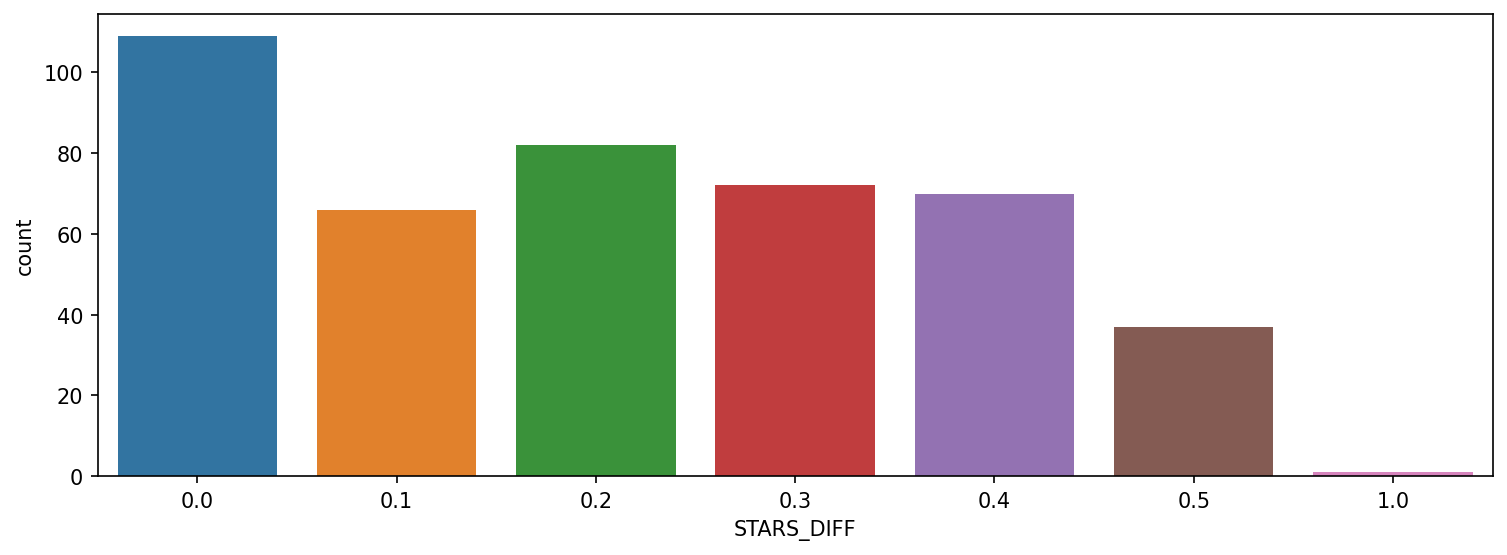

In [126]:
#count plot to display the number of times a certain difference occurs.
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=fan_reviewed,x='STARS_DIFF',)

In [127]:
#from the plot we can see that there is a movie with a 1 star diff from it's true rating.
fan_reviewed[fan_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [156]:
#COMPARISON OF FANDANGO RATINGS TO OTHER SITES (Rotten Tomatoes,Metacritic,IMDB)
all_sites = pd.read_csv("fandango_score_comparison.csv")
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [129]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,...,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


(0.0, 100.0)

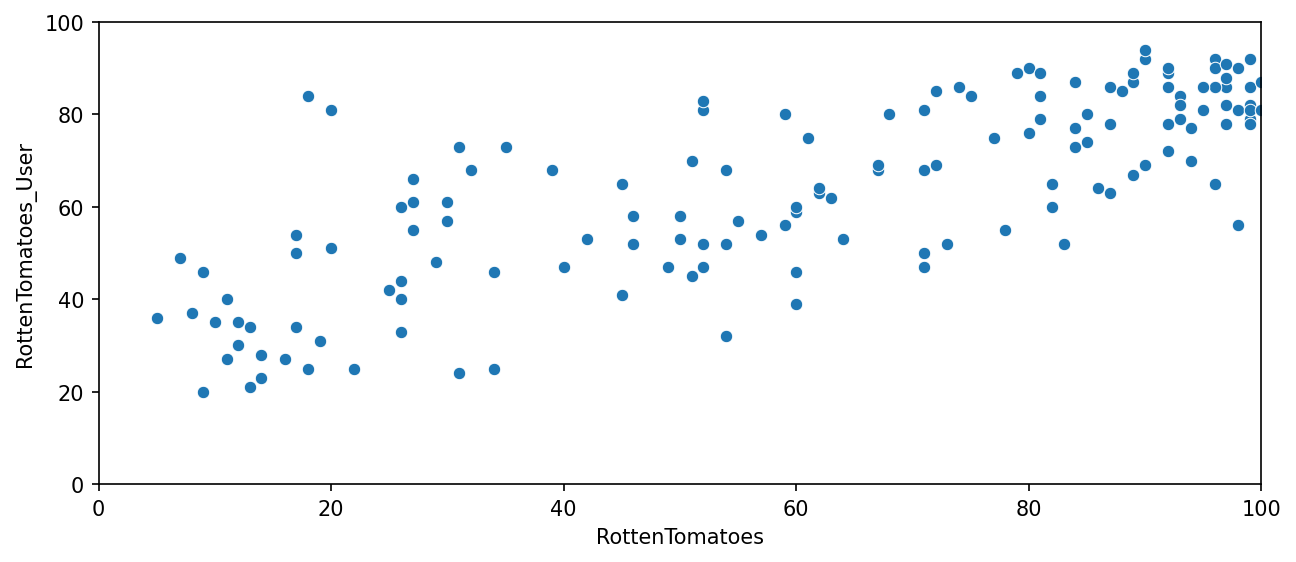

In [130]:
#ROTTEN Tomatoes
#relationship b/w RT Critic reviews and RT User reviews.
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

In [131]:
all_sites['Rotten_Diff']=all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']
all_sites['Rotten_Diff'].apply(abs).mean() #Mean Absolute diff b/w RT scores and RT User Scores.

15.095890410958905

C:\Users\KETUPATI SWARGIARY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rotten_Diff', ylabel='Count'>

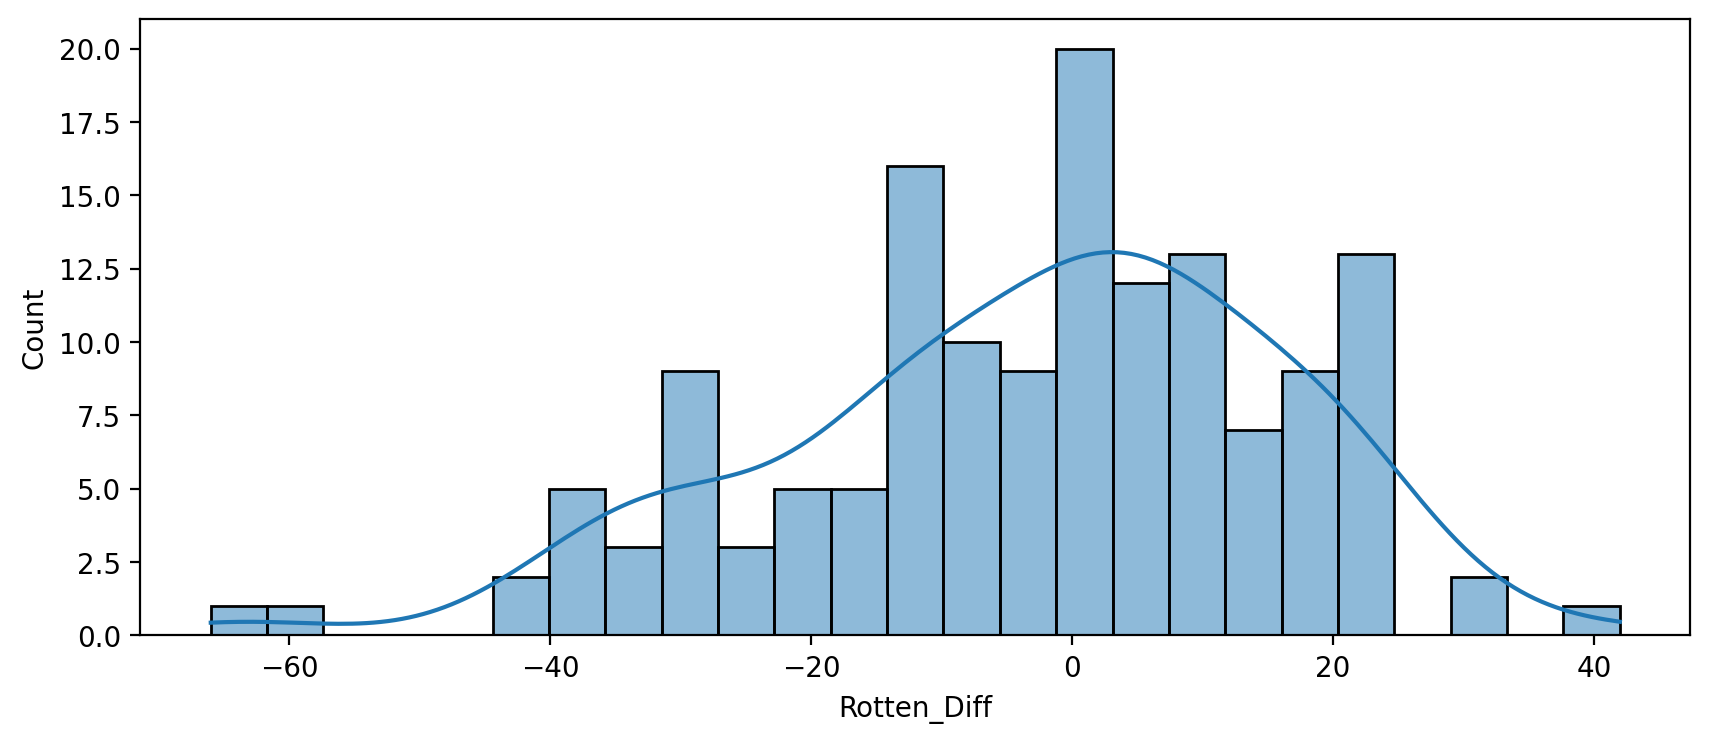

In [132]:
#plot for the distribution of the diff b/w RT critics score and RT User score.
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True,bins=25)

C:\Users\KETUPATI SWARGIARY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rotten_Diff', ylabel='Count'>

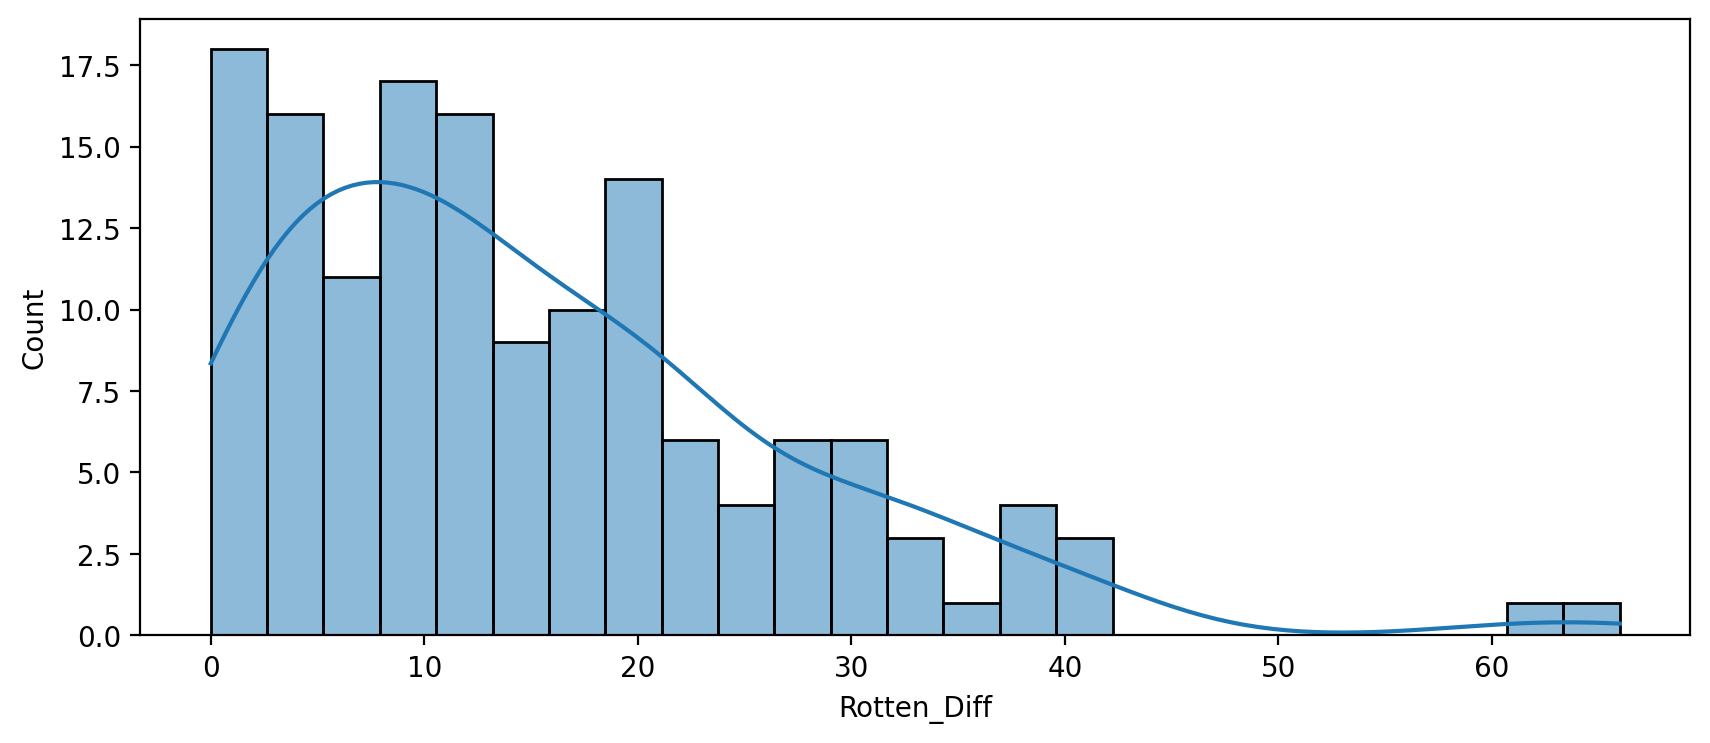

In [133]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites,x=all_sites['Rotten_Diff'].apply(abs),kde=True,bins=25)

In [134]:
all_sites.nsmallest(5,'Rotten_Diff')['FILM']#top 5 movies users rated higher than critics on average.

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

In [135]:
all_sites.nlargest(5,'Rotten_Diff')['FILM']#top 5 movies critics scores higher than users on average.

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

(0.0, 100.0)

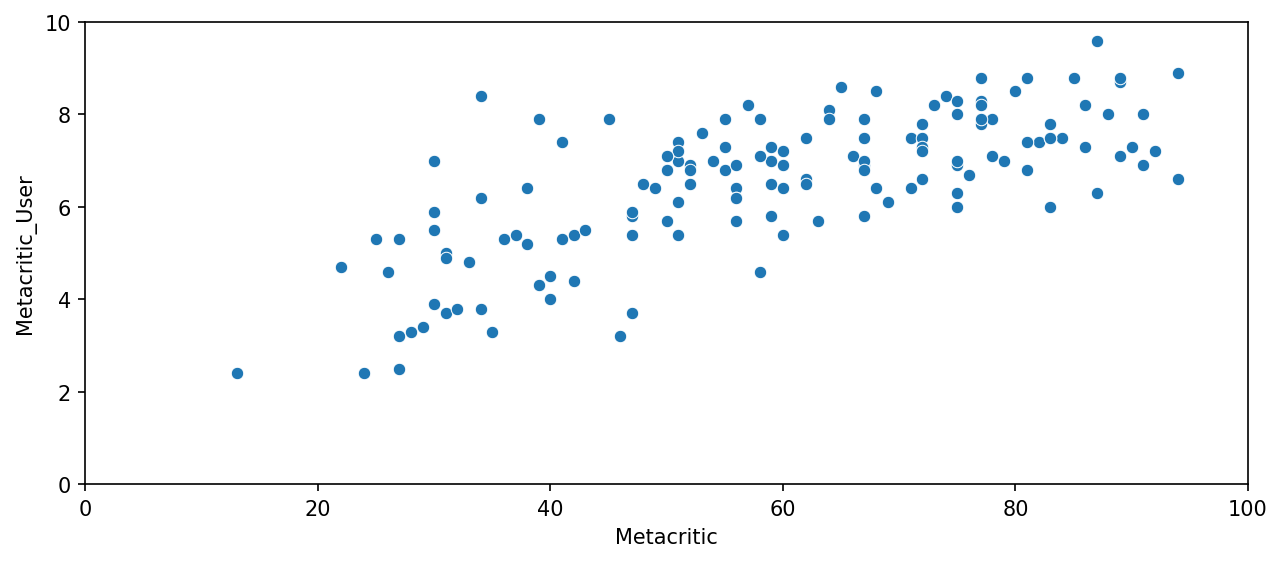

In [136]:
#METACRITIC RATING
#relationship b/w Metacritic and Metacritic_User reviews.
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

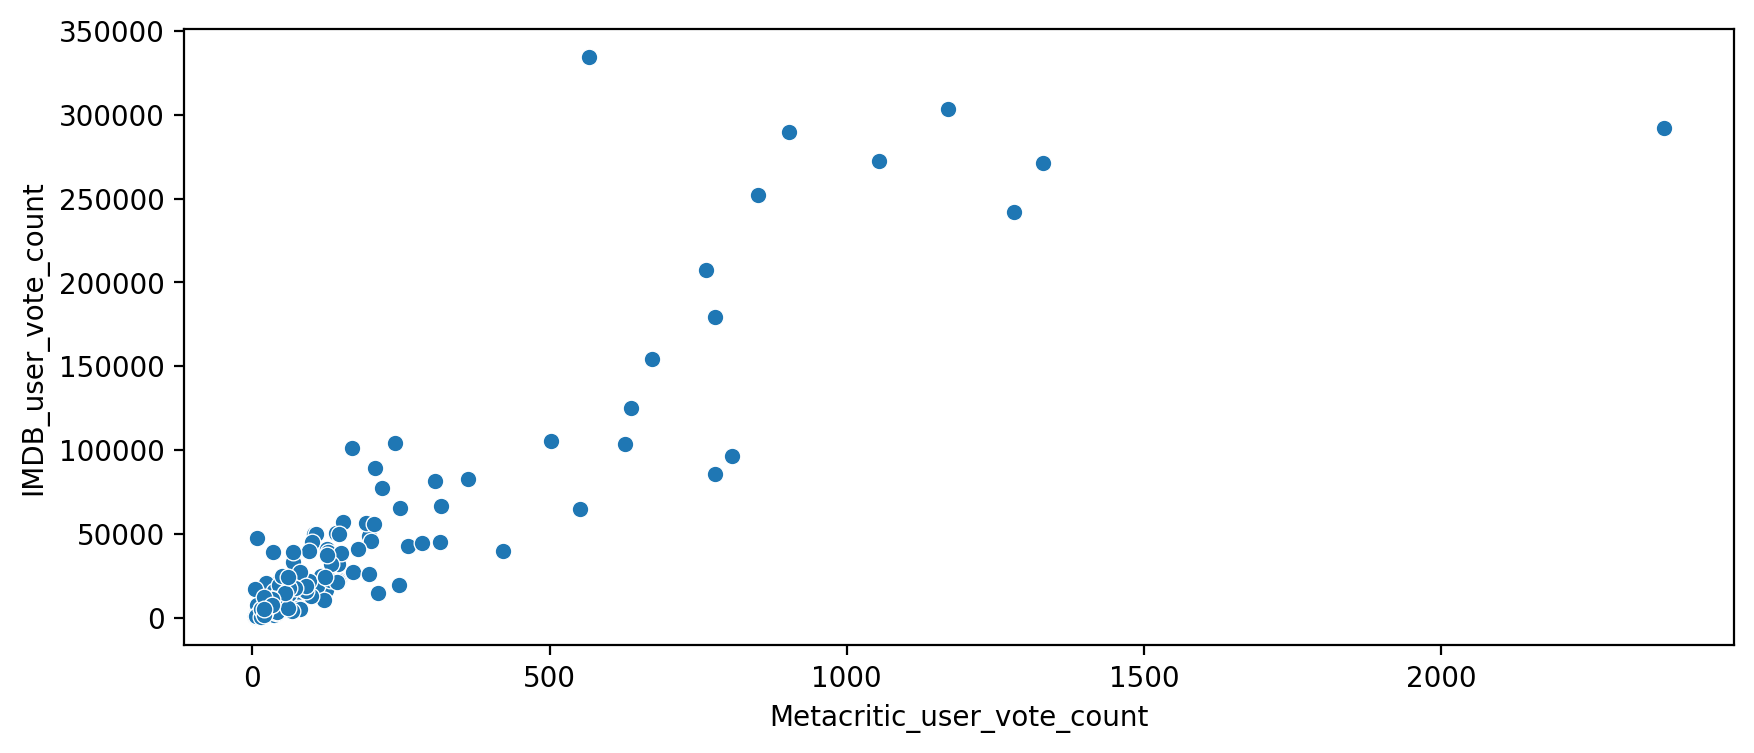

In [137]:
#IMDB
#Scatterplot for the relationship b/w vote counts on MetaCritic Versus vote counts on IMDB
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

In [138]:
all_sites.nlargest(1,'IMDB_user_vote_count')#movie with highest vote count on IMDB and less count in Metacritic.

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,5.0,4.6,4.5,4.6,...,4.5,4.5,3.5,4.0,4.0,566,334164,8055,0.4,-2


In [139]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,4.5,4.3,4.85,4.4,...,5.0,4.5,4.5,4.5,4.0,2375,292023,10509,0.2,9


In [140]:
#FANDANGO SCORES VS ALL SITES
df = pd.merge(fandango,all_sites,on='FILM',how='inner')
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,...,1.5,2.0,2.5,1.5,2.0,778,179506,34846,0.1,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,...,3.5,4.0,3.0,3.5,3.5,1281,241807,34390,0.0,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,...,3.5,4.5,3.5,3.5,3.5,850,251856,34085,0.2,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,...,4.0,4.0,3.5,3.5,3.5,764,207211,33538,0.2,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,...,5.0,4.5,4.5,4.5,4.5,807,96252,15749,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,...,4.5,3.0,3.5,3.0,3.5,19,5289,41,0.0,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,...,5.0,4.0,4.5,3.0,3.5,18,1107,38,0.4,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,...,4.5,4.0,3.5,3.5,4.0,4,732,38,0.3,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,...,5.0,4.5,4.5,3.5,3.5,14,696,36,0.1,9


In [141]:
#new normalized columns for all ratings so they match up with the 0-5 star range shown on Fandango.
import numpy as np
df['RT_Norm']=np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm']=np.round(df['RottenTomatoes_User']/20,1)
df['Meta_Norm']=np.round(df['Metacritic']/20,1)
df['Meta_U_Norm']=np.round(df['Metacritic_User']/2,1)
df['IMDB_Norm']=np.round(df['IMDB']/2,1)
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,...,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,...,778,179506,34846,0.1,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,...,1281,241807,34390,0.0,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,...,850,251856,34085,0.2,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,...,764,207211,33538,0.2,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,...,807,96252,15749,0.0,8,4.9,4.5,4.7,4.4,4.3


In [142]:
#norm_scores data-frame that only contains the normalizes ratings. Including both STARS and RATING from the original Fandango table.
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Fandango_Stars', 'Fandango_Ratingvalue', 'RT_norm', 'RT_user_norm',
       'Metacritic_norm', 'Metacritic_user_nom', 'IMDB_norm', 'RT_norm_round',
       'RT_user_norm_round', 'Metacritic_norm_round',
       'Metacritic_user_norm_round', 'IMDB_norm_round',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Fandango_votes',
       'Fandango_Difference', 'Rotten_Diff', 'RT_Norm', 'RTU_Norm',
       'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm'],
      dtype='object')

In [143]:
norm_scores = df[['STARS', 'RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


C:\Users\KETUPATI SWARGIARY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


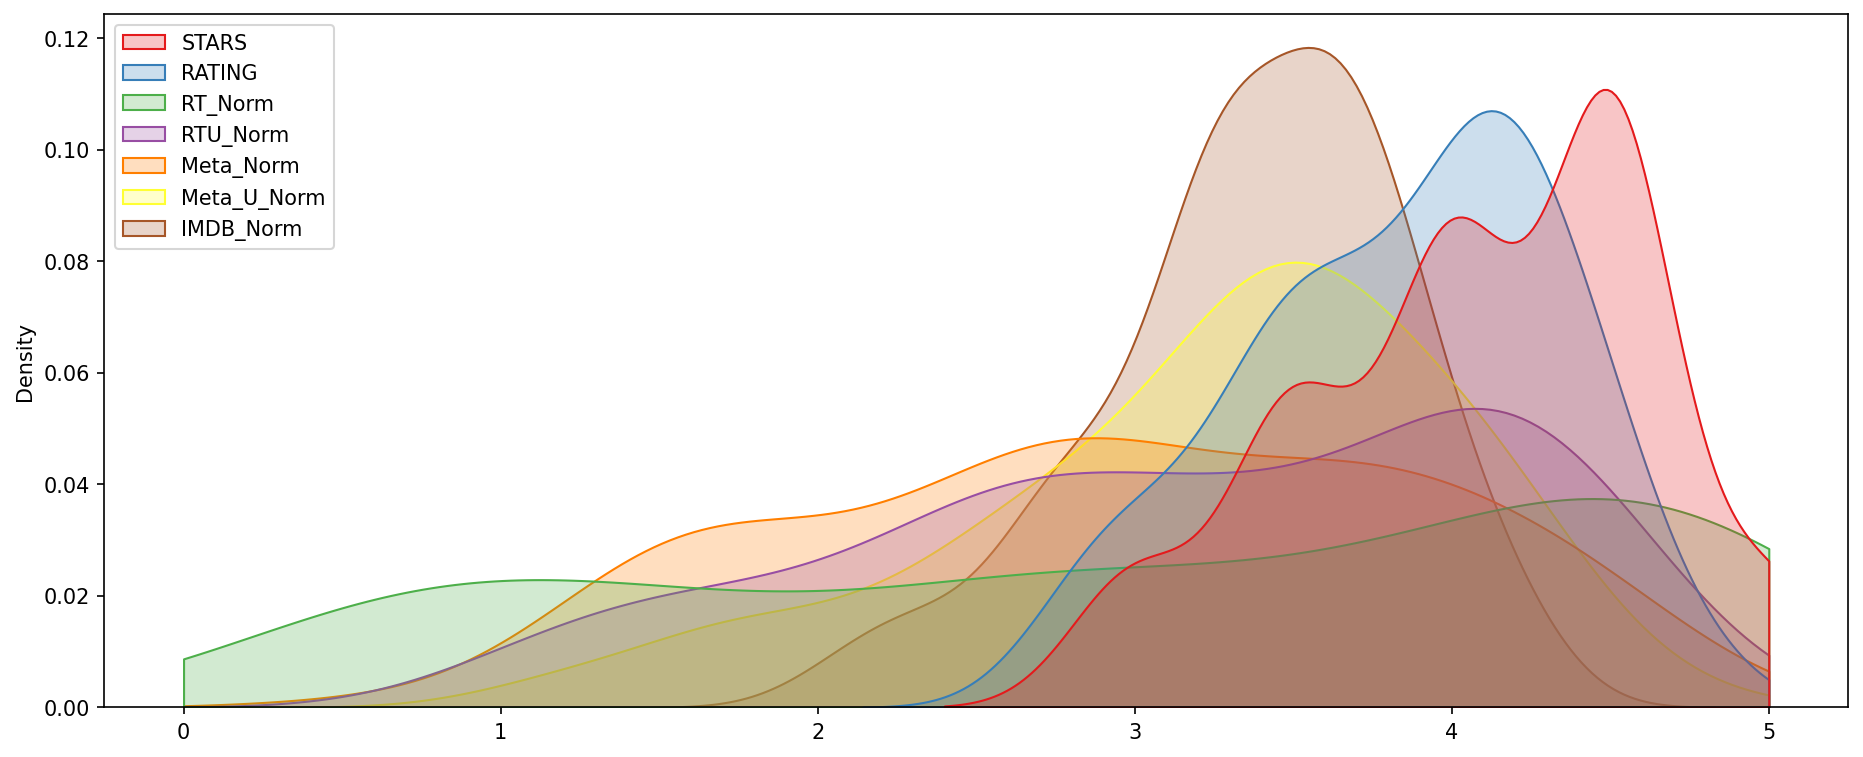

In [148]:
#Comparing Distribution of Scores Across Sites
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legend_handles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],fill=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

C:\Users\KETUPATI SWARGIARY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


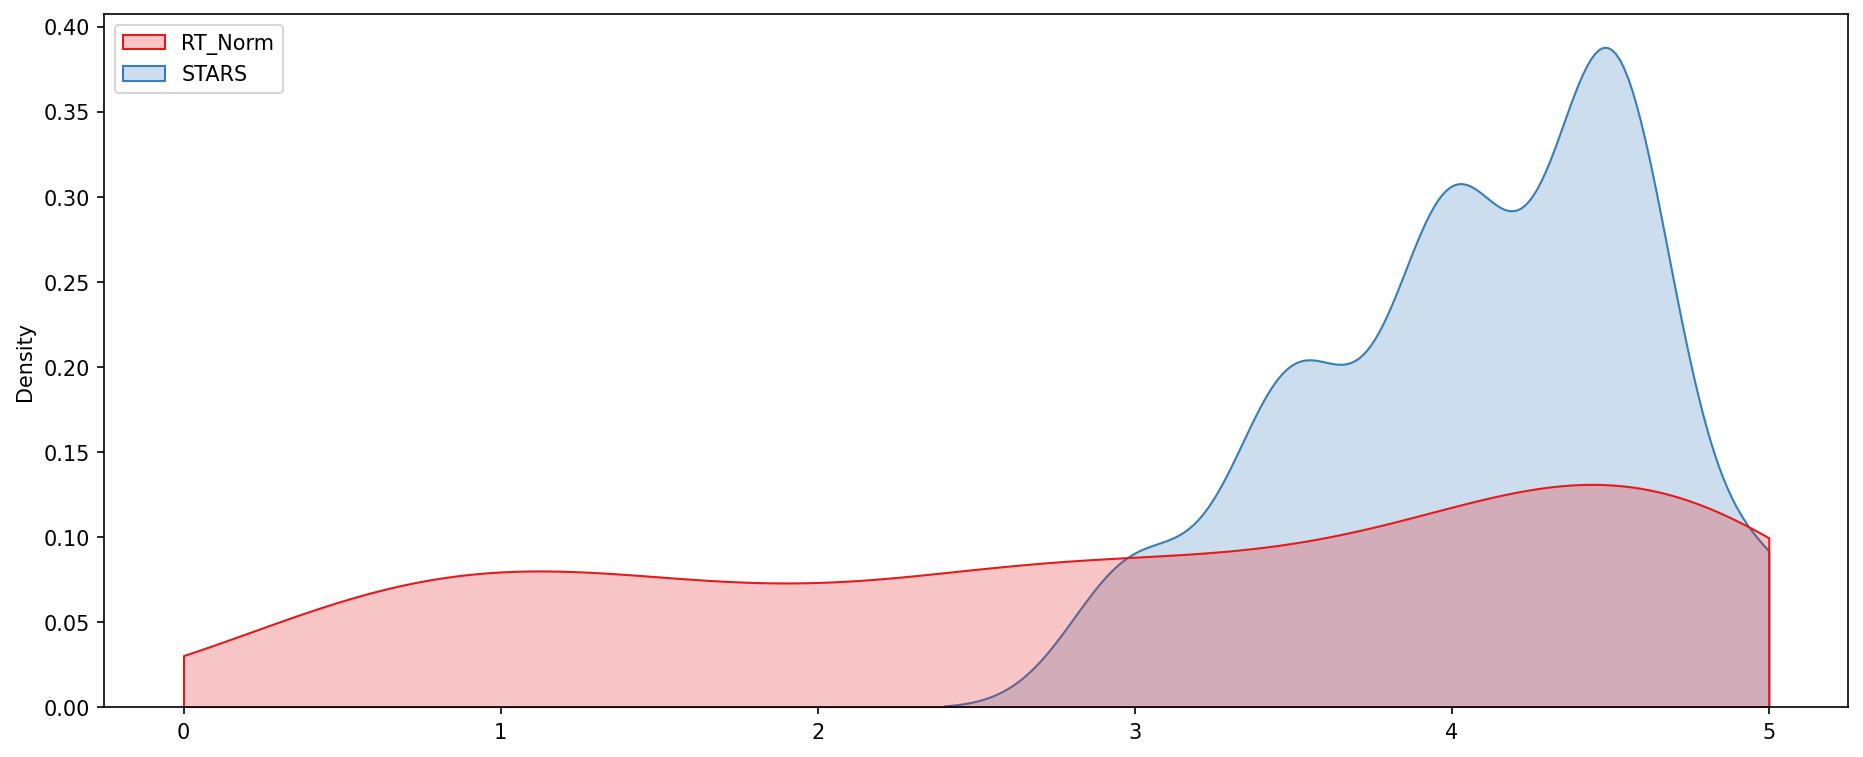

In [150]:
#Comparision b/w the distribution of RT critics ratings against the STARS displayed by Fandango.
fig, ax = plt.subplots(figsize=(15,6),dpi=200)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],fill=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

In [152]:
norm_scores.columns

Index(['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm'],
      dtype='object')

In [154]:
#Top 10 worst films in the list.
norm_films = df[['FILM','STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm']]
worst_films = norm_films.nsmallest(10,'RT_Norm')

C:\Users\KETUPATI SWARGIARY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


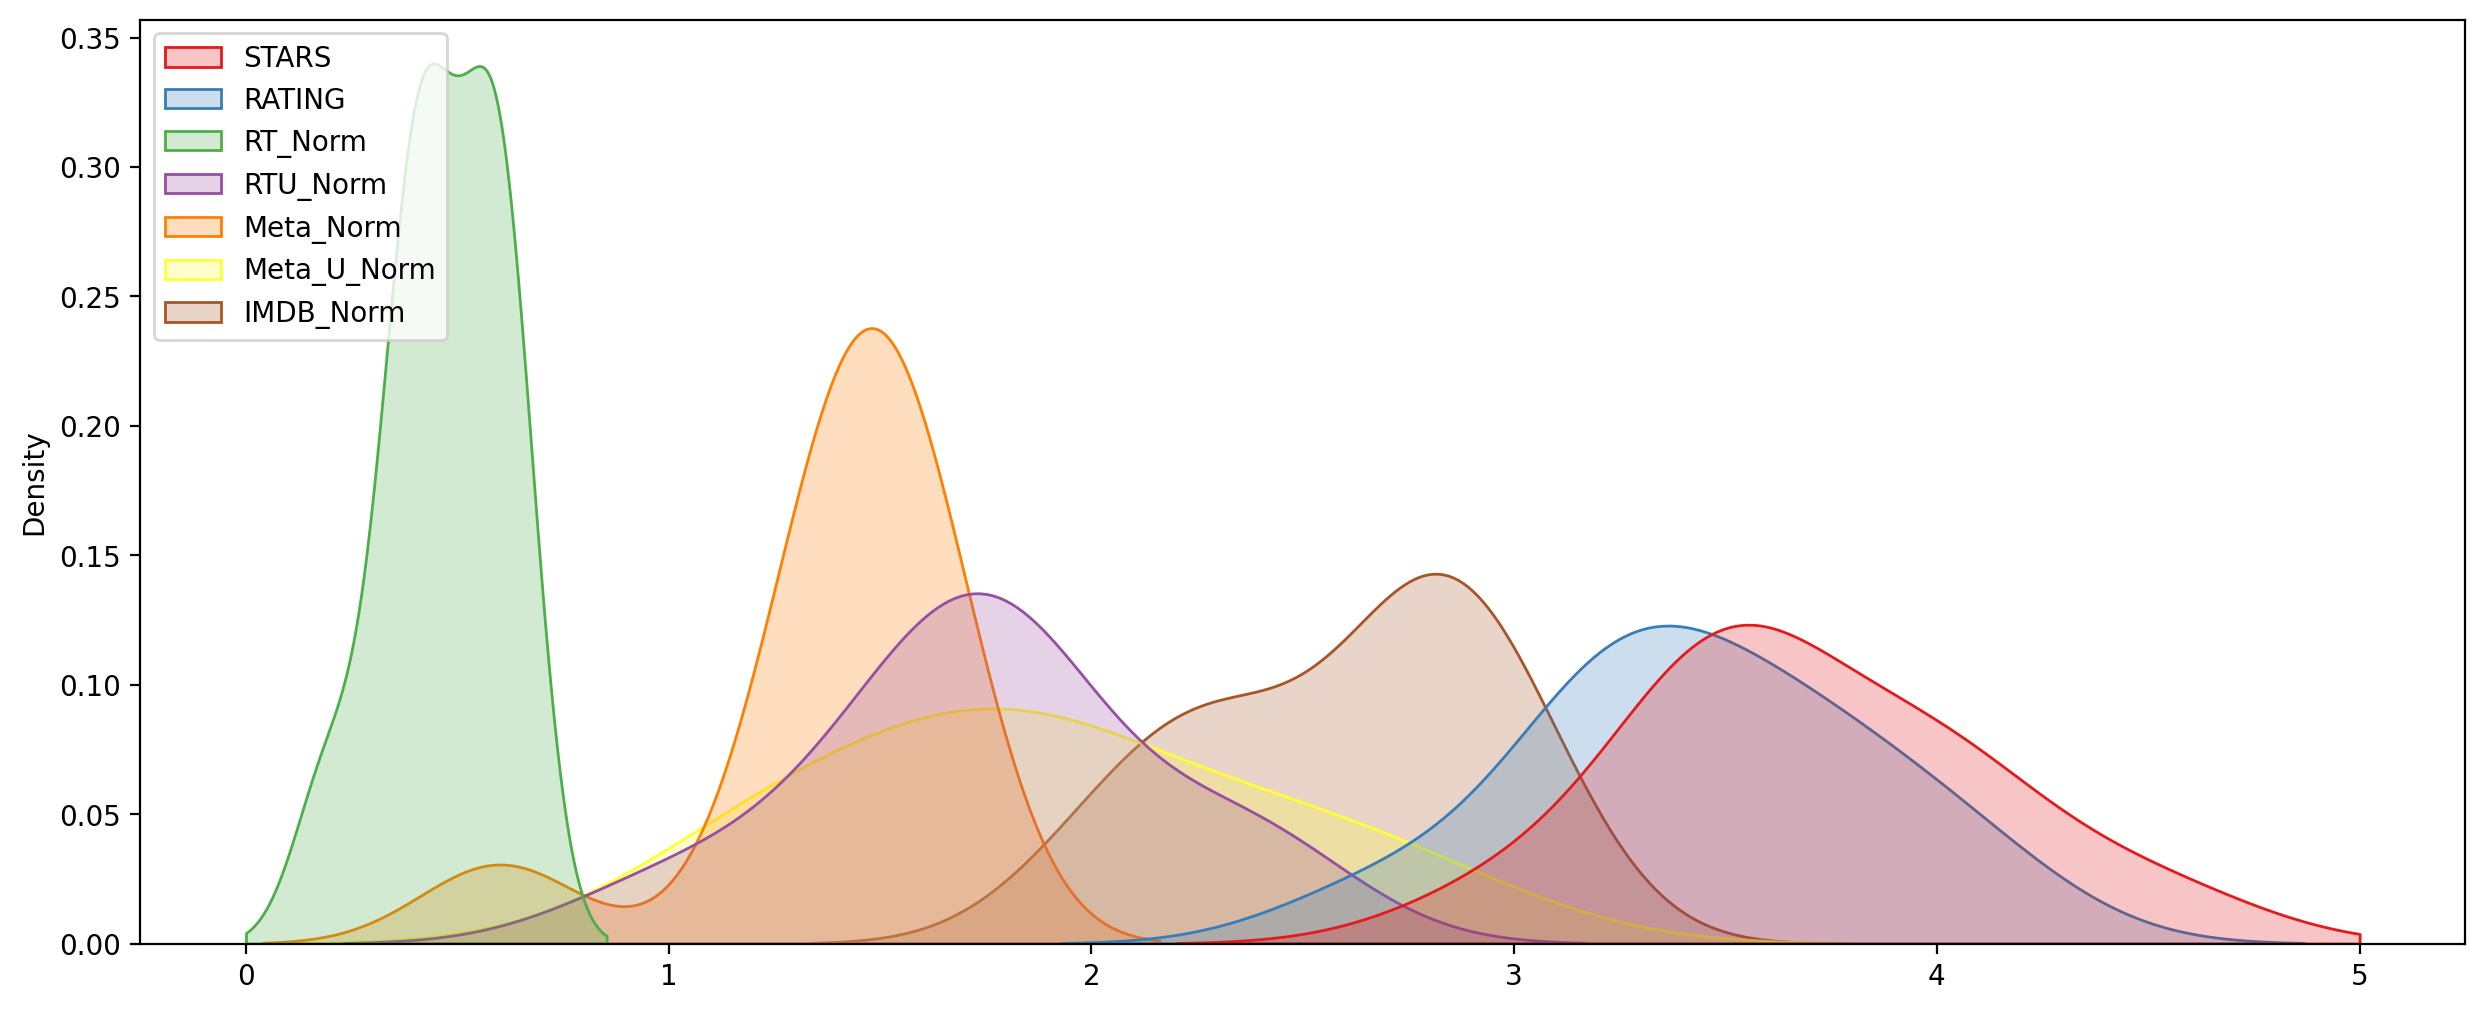

In [155]:
#Distribution of ratings across all sites for the top 10 worst movies.
fig, ax = plt.subplots(figsize=(15,6),dpi=200)
sns.kdeplot(data=worst_films,clip=[0,5],fill=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")